In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
import scipy as sp
import itertools

In [3]:
workbook_url = '/Users/jonasnaumann/Projekte/Netzwerke/_Pores 2.xlsx'

In [4]:
one = [5.894740028, 5.74681129, 5.811694761, 5.479599985, 5.622210953, 5.811694761, 5.818859338, 5.74681129, 5.811694761, 5.547609575, 5.74681129, 5.811694761, 6.06429056, 6.062, 5.74681129, 5.74681129, 5.811694761, 5.811694761, 5.830780737, 5.55511476, 5.811694761, 6.062, 6.313380394, 5.74681129]
two = [5.198672138, 5.34098343, 5.34098343, 5.267672351, 5.198672138, 5.34098343, 6.324369692, 6.304575164, 6.06429056, 6.062, 6.304575164, 6.009075802, 6.06429056, 6.132609885, 6.123544725, 6.123544725, 6.06429056, 5.74681129, 5.267672351, 5.196, 5.049604341, 5.198672138, 4.89883578, 5.196]
three = [4.977582144, 5.196, 4.977582144, 4.985945447, 5.198672138, 5.060593641, 5.060593641, 5.477064907, 5.049604341, 5.34098343, 5.196, 5.291347276, 5.477064907, 5.34098343, 5.477064907, 5.479599985, 4.985945447, 5.206680324, 5.198672138, 5.196, 5.54510559, 5.291347276, 5.267672351, 5.477064907]

c_19 = [6.98191521, 6.983904066, 6.928, 6.98191521, 6.999794568, 6.98191521, 6.82092721, 6.983904066, 7.195466628, 7.201254613, 7.195466628, 7.143163445, 7.60094652, 7.794, 7.195466628, 7.457066984, 7.7529081, 7.3501434, 7.422529563, 7.60094652, 7.3501434, 7.457066984, 7.449613681, 7.801124278]
c_28 = [7.84196353, 7.938770686, 7.7529081, 7.650120522, 7.745739474, 7.794, 7.938770686, 7.9841255, 7.9841255, 7.801124278, 7.94401712, 8.171527397, 7.7529081, 7.94401712, 7.801124278, 7.650120522, 7.801124278, 7.794, 7.606425968, 7.3501434, 7.60094652, 7.195466628, 7.399107243, 7.148993775]
c_37 = [8.353064348, 7.801124278, 7.938770686, 7.938770686, 8.03268274, 8.16982766, 7.801124278, 7.94401712, 7.94401712, 7.801124278, 8.171527397, 7.938770686, 7.9841255, 7.9841255, 7.9841255, 7.9841255, 7.801124278, 7.801124278, 7.94401712, 7.745739474, 7.801124278, 7.938770686, 7.801124278, 7.615549619]

g10_19 = [6.771884524, 6.928, 6.98191521, 6.763676219, 6.82092721, 6.771884524, 6.482693267, 6.82092721, 6.98191521, 6.489117043, 6.983904066, 6.928, 7.143163445, 7.013669225, 7.399107243, 6.983904066, 7.043308881, 6.98191521, 7.3501434, 7.195466628, 7.195466628, 7.3501434, 7.201254613, 7.195466628]
g10_28 = [6.482693267, 6.482693267, 6.98191521, 6.304575164, 6.36595633, 6.304575164, 7.143163445, 6.98191521, 6.763676219, 7.172267703, 6.540280422, 6.782130934, 6.82092721, 6.989867238, 6.82092721, 6.482693267, 6.546647692, 6.782130934, 6.983904066, 7.043308881, 6.782130934, 6.540280422, 6.928, 6.82092721]
g10_37 = [6.82092721, 6.999794568, 6.98191521, 6.82092721, 6.928, 6.82092721, 6.782130934, 6.782130934, 6.983904066, 6.59525951, 6.253704182, 6.313380394, 6.98191521, 7.148993775, 6.928, 6.928, 6.928, 6.928, 6.928, 6.82092721, 6.928, 6.983904066, 6.98191521, 6.763676219]

g20_19 = [4.89883578, 5.198672138, 4.977582144, 5.196, 4.985945447, 5.196, 5.479599985, 5.34098343, 5.267672351, 5.267672351, 5.477064907, 5.049604341, 5.477064907, 5.74681129, 5.622210953, 5.55511476, 5.479599985, 5.479599985, 5.54510559, 5.547609575, 5.811694761, 5.74681129, 5.479599985, 5.811694761]
g20_28 = [5.198672138, 5.34098343, 5.34098343, 5.267672351, 5.198672138, 5.34098343, 6.324369692, 6.304575164, 6.06429056, 6.062, 6.304575164, 6.009075802, 6.06429056, 6.132609885, 6.123544725, 6.123544725, 6.06429056, 5.74681129, 5.267672351, 5.196, 5.049604341, 5.198672138, 4.89883578, 5.196]
g20_37 = [6.132609885, 6.304575164, 3.97200856, 6.132609885, 6.244814809, 6.062, 6.06429056, 6.36595633, 6.253704182, 6.304575164, 6.123544725, 6.306777624, 6.244814809, 6.244814809, 6.771884524, 6.59525951, 6.244814809, 6.540280422, 6.540280422, 6.763676219, 6.540280422, 6.546647692, 6.59525951, 6.244814809]

g30_19 = [5.74681129, 6.062, 6.06429056, 6.06429056, 5.622210953, 5.74681129, 6.06429056, 6.06429056, 5.809304606, 5.894740028, 5.809304606, 5.74681129, 6.062, 6.06429056, 6.062, 6.062, 6.062, 6.304575164, 6.062, 6.062, 6.062, 6.062, 6.123544725, 6.306777624]
g30_28 = [5.267672351, 5.049604341, 5.049604341, 5.196, 4.985945447, 5.196, 5.196, 5.049604341, 4.977582144, 5.049604341, 5.049604341, 5.049604341, 6.123544725, 6.009075802, 6.06429056, 5.74681129, 5.74681129, 5.55511476, 6.062, 6.06429056, 5.809304606, 6.06429056, 6.06429056, 5.809304606]
g30_37 = [6.763676219, 6.36595633, 6.98191521, 6.304575164, 6.313380394, 6.771884524, 6.482693267, 6.59525951, 6.482693267, 6.482693267, 6.82092721, 6.313380394, 6.306777624, 6.37467082, 6.253704182, 6.304575164, 6.763676219, 6.244814809, 6.489117043, 6.771884524, 6.304575164, 6.244814809, 6.253704182, 6.36595633]

g40_19 = [5.479599985, 5.477064907, 5.198672138, 5.34098343, 5.206680324, 5.267672351, 5.267672351, 5.049604341, 5.34098343, 5.34098343, 5.196, 5.34098343, 5.267672351, 5.477064907, 5.34098343, 5.34098343, 5.267672351, 5.477064907, 5.54510559, 5.34098343, 5.477064907, 5.479599985, 5.34098343]
g40_28 = [5.55511476, 5.622210953, 5.55511476, 5.547609575, 5.547609575, 5.54510559, 5.54510559, 5.54510559, 5.479599985, 5.267672351, 5.74681129, 5.54510559, 6.123544725, 6.123544725, 6.123544725, 6.244814809, 6.253704182, 6.06429056, 6.540280422, 6.304575164, 6.313380394, 6.304575164, 6.36595633, 6.306777624]
g40_37 = [6.482693267, 6.82092721, 6.82092721, 6.82092721, 6.928, 6.928, 6.837196501, 6.983904066, 6.98191521, 6.983904066, 6.98191521, 6.983904066, 6.540280422, 6.98191521, 6.928, 6.499809228, 6.82092721, 6.482693267, 6.82092721, 6.546647692, 6.59525951, 6.546647692, 6.983904066, 6.98191521]

g50_19 = [6.253704182, 6.313380394, 6.36595633, 6.313380394, 6.244814809, 6.540280422, 5.622210953, 5.54510559, 5.479599985, 5.74681129, 5.74681129, 5.479599985, 5.267672351, 5.196, 5.196, 5.267672351, 5.198672138, 5.196, 5.206680324, 5.206680324, 5.196, 5.267672351, 5.198672138, 5.196]
g50_28 = [6.306777624, 6.306777624, 6.244814809, 6.36595633, 6.123544725, 6.36595633, 6.306777624, 6.304575164, 6.489117043, 6.123544725, 6.306777624, 6.482693267, 5.811694761, 6.06429056, 5.811694761, 6.009075802, 6.062, 6.123544725, 6.062, 6.06429056, 6.123544725, 6.009075802, 5.809304606, 6.06429056]
g50_37 = [6.132609885, 6.06429056, 6.244814809, 6.062, 6.06429056, 6.06429056, 6.259251172, 6.244814809, 6.06429056, 6.304575164, 6.123544725, 6.244814809, 5.811694761, 5.74681129, 5.809304606, 5.809304606, 6.123544725, 6.062, 6.763676219, 6.540280422, 6.304575164, 6.782130934, 6.489117043, 6.244814809]

g60_19 = [4.663552723, 4.415750899, 4.428313449, 4.33, 4.428313449, 4.415750899, 4.33, 4.415750899, 4.33, 4.428313449, 4.33, 4.33, 4.663552723, 4.663552723, 4.663552723, 4.428313449, 4.663552723, 4.415750899, 5.049604341, 4.910162523, 4.66652976, 4.89883578, 4.675449497, 4.66652976]
g60_28 = [4.255590206, 4.33, 4.33, 4.33, 4.415750899, 4.33, 4.746204378, 4.66652976, 4.66652976, 4.977582144, 4.66652976, 4.746204378, 4.33, 4.33, 4.33, 4.415750899, 4.415750899, 4.415750899, 4.977582144, 5.198672138, 5.196, 4.977582144, 5.34098343, 5.34098343]
g60_37 = [5.547609575, 5.74681129, 5.74681129, 5.622210953, 5.54510559, 5.622210953, 4.415750899, 4.663552723, 4.428313449, 4.415750899, 4.663552723, 4.66652976, 5.55511476, 5.479599985, 5.477064907, 5.547609575, 5.809304606, 5.34098343, 4.663552723, 4.663552723, 4.415750899, 4.663552723, 4.663552723, 4.663552723]


In [88]:
medians_groups = [[], [], [], [], [], [], []]
iterator_groups = ['clean', '10 kGy', '20 kGy', '30 kGy', '40 kGy', '50 kGy', '60 kGy']
group_start_end = [(33, 37), (9, 13), (45, 49), (57, 61), (69, 73), (81, 85), (21, 25)]
iterator_samples = [[i for i in range(*group_start_end[j])] for j in range(len(group_start_end))]

for Diameter_x_group in range(len((iterator_groups))):
    for i in range(4):
        for j in range(6):
            name = str(iterator_samples[Diameter_x_group][i])+'_0'+str(j)
            readout = pd.read_excel(workbook_url, sheet_name=[name], usecols='D')
            dummy = readout[name]
            
            #normal = pg.normality(dummy, method='jarque_bera').iloc[0].iloc[2]

            #if normal == False:
            median = dummy.median().iloc[0]
            #else:
            #    median = 'NaN'
            #    print(str(Diameter_x_group)+'_'+str(name)+'_is normally distributed')

            medians_groups[Diameter_x_group].append(float(median))

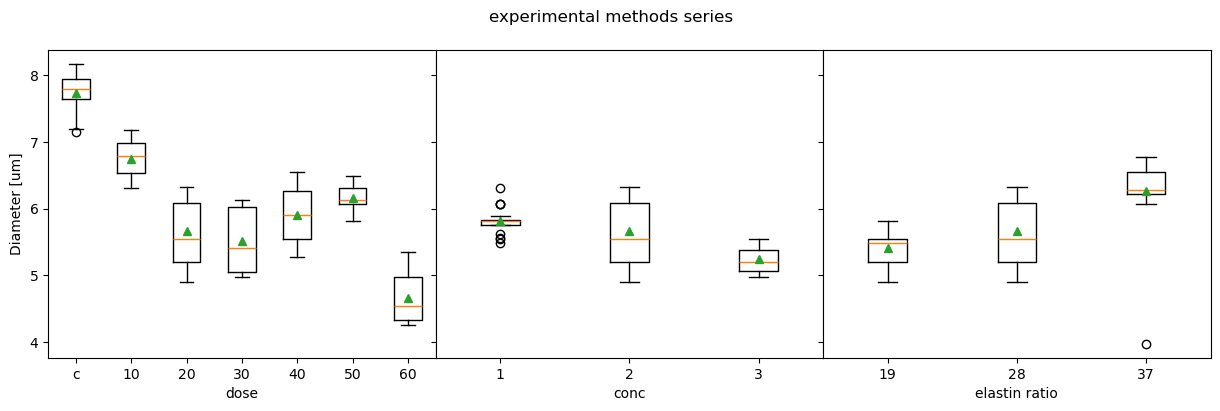

In [10]:
fig1, axes1 = plt.subplots(ncols=3, sharey=True, figsize=(15,4))
fig1.subplots_adjust(wspace=0)

axes1[0].boxplot([c_28, g10_28, g20_28, g30_28, g40_28, g50_28, g60_28], showmeans=True)
axes1[0].set_xlabel('dose')
axes1[0].set_xticklabels(['c','10','20', '30', '40', '50', '60'])
axes1[0].set_ylabel('Diameter [um]')

axes1[1].boxplot([one, two, three], showmeans=True)
axes1[1].set_xlabel('conc')
axes1[1].set_xticklabels(['1','2','3'])

axes1[2].boxplot([g20_19, g20_28, g20_37], showmeans=True)
axes1[2].set_xlabel('elastin ratio')
axes1[2].set_xticklabels(['19','28','37'])

fig1.suptitle('experimental methods series')
plt.show()
fig1.savefig('Diameter_series_hg.pdf')

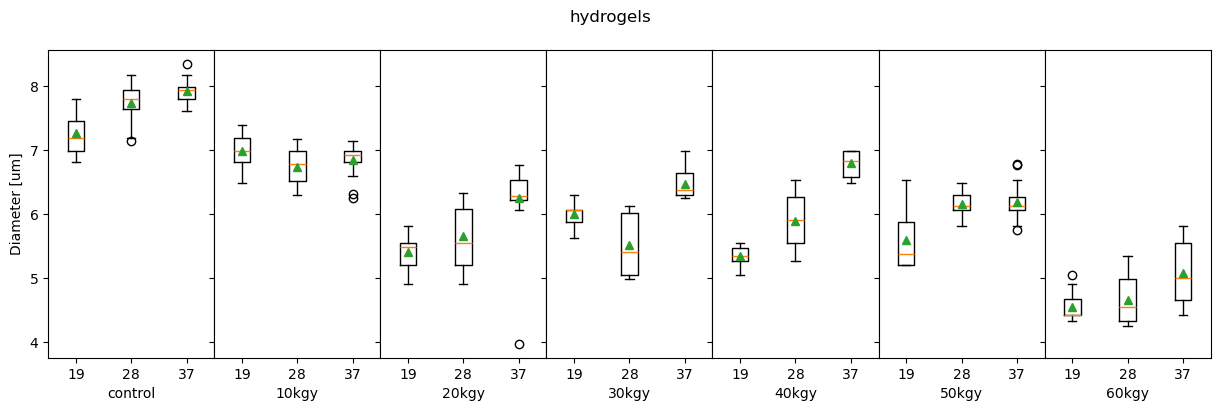

In [6]:
fig2, axes2 = plt.subplots(ncols=7, sharey=True, figsize=(15,4))
fig2.subplots_adjust(wspace=0)

axes2[0].boxplot([c_19, c_28, c_37], showmeans=True)
axes2[0].set_xlabel('control')
axes2[0].set_xticklabels(['19','28','37'])
axes2[0].set_ylabel('Diameter [um]')

axes2[1].boxplot([g10_19, g10_28, g10_37], showmeans=True)
axes2[1].set_xlabel('10kgy')
axes2[1].set_xticklabels(['19','28','37'])

axes2[2].boxplot([g20_19, g20_28, g20_37], showmeans=True)
axes2[2].set_xlabel('20kgy')
axes2[2].set_xticklabels(['19','28','37'])

axes2[3].boxplot([g30_19, g30_28, g30_37], showmeans=True)
axes2[3].set_xlabel('30kgy')
axes2[3].set_xticklabels(['19','28','37'])

axes2[4].boxplot([g40_19, g40_28, g40_37], showmeans=True)
axes2[4].set_xlabel('40kgy')
axes2[4].set_xticklabels(['19','28','37'])

axes2[5].boxplot([g50_19, g50_28, g50_37], showmeans=True)
axes2[5].set_xlabel('50kgy')
axes2[5].set_xticklabels(['19','28','37'])

axes2[6].boxplot([g60_19, g60_28, g60_37], showmeans=True)
axes2[6].set_xlabel('60kgy')
axes2[6].set_xticklabels(['19','28','37'])

fig2.suptitle('hydrogels')
plt.show()
#fig1.savefig('YM_hydrogels.pdf')

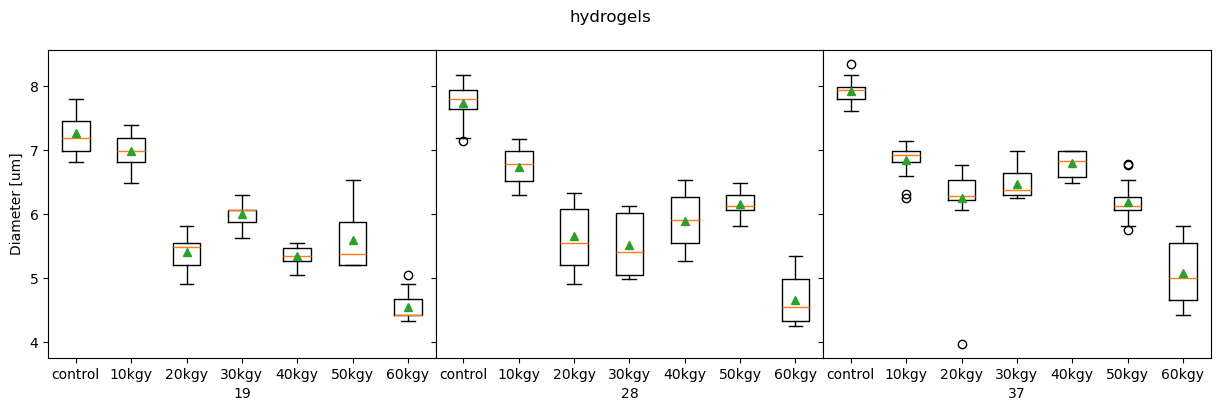

In [55]:
fig3, axes3 = plt.subplots(ncols=3, sharey=True, figsize=(15,4))
fig3.subplots_adjust(wspace=0)

axes3[0].boxplot([c_19, g10_19, g20_19, g30_19, g40_19, g50_19, g60_19], showmeans=True)
axes3[0].set_xlabel('19')
axes3[0].set_xticklabels(['control', '10kgy','20kgy','30kgy', '40kgy', '50kgy', '60kgy'])
axes3[0].set_ylabel('Diameter [um]')

axes3[1].boxplot([c_28, g10_28, g20_28, g30_28, g40_28, g50_28, g60_28], showmeans=True)
axes3[1].set_xlabel('28')
axes3[1].set_xticklabels(['control', '10kgy','20kgy','30kgy', '40kgy', '50kgy', '60kgy'])

axes3[2].boxplot([c_37, g10_37, g20_37, g30_37, g40_37, g50_37, g60_37], showmeans=True)
axes3[2].set_xlabel('37')
axes3[2].set_xticklabels(['control', '10kgy','20kgy','30kgy', '40kgy', '50kgy', '60kgy'])

fig3.suptitle('hydrogels')
plt.show()
fig3.savefig('diameter_doses_hg.pdf')

In [39]:
variable = three

n = len(variable)
mean = np.mean(variable)
median = np.median(variable)
sem = sp.stats.sem(variable)

display(variable, n, float(mean), float(median), float(sem))

[4.977582144,
 5.196,
 4.977582144,
 4.985945447,
 5.198672138,
 5.060593641,
 5.060593641,
 5.477064907,
 5.049604341,
 5.34098343,
 5.196,
 5.291347276,
 5.477064907,
 5.34098343,
 5.477064907,
 5.479599985,
 4.985945447,
 5.206680324,
 5.198672138,
 5.196,
 5.54510559,
 5.291347276,
 5.267672351,
 5.477064907]

24

5.239798765458334

5.202676231

0.03757845664250861

In [53]:
list_stat = list(itertools.chain(g60_19, g60_28, g60_37))

df_stat = pd.DataFrame({'via': list_stat,
                        'group': np.repeat(['19', '28', '37'],
                                            repeats=[len(g60_19), len(g60_28), len(g60_37)])})

display(pg.normality(df_stat, dv='via', group='group', method='shapiro'))
#display(pg.homoscedasticity(df_stat, dv='via', group='group', method='bartlett'))
#display(pg.welch_anova(df_stat, dv='via', between='group'))
#display(pg.anova(df_stat, dv='via', between='group'))
display(pg.kruskal(df_stat, dv='via', between='group', detailed=True))
display(pg.pairwise_tests(df_stat, dv='via', between='group', parametric=False, padjust='holm'))
#display(pg.pairwise_gameshowell(df_stat, dv='via', between='group'))
#display(pg.pairwise_tukey(df_stat, dv='via', between='group'))
#display(pg.pairwise_tests(df_stat, dv='via', between='group', correction='True'))#, parametric=False))

,W,pval,normal
group,,,
19,0.854961,0.002706,False
28,0.852639,0.002448,False
37,0.815904,0.000542,False


,Source,ddof1,H,p-unc
Kruskal,group,2,13.046821,0.001469


,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,group,19,28,False,False,266.5,two-sided,0.661309,0.661309,holm,-0.351476
1,group,19,37,False,False,128.5,two-sided,0.000921,0.002762,holm,-1.310606
2,group,28,37,False,False,149.5,two-sided,0.004232,0.008465,holm,-0.933918
